# Stock Price Prediction using LSTM 

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


# 1. Loading the Data

In [2]:
# Import Train and Test file
sm_train = pd.read_csv(r'C:\Users\AARTI GARG\Downloads\archive\Google_Stock_Price_Train.csv')
sm_test = pd.read_csv(r'C:\Users\AARTI GARG\Downloads\archive\Google_Stock_Price_Test.csv')

In [3]:
past_60_days = sm_train.tail(60)

In [4]:
sm_train.head(20) # check Few record of train Data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [5]:
sm_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


Date from 03.01.2012 to 30.12.2016

### About Dataset:¶
The dataset captures the historical stock price information. offering a comprehensive perspective on the company's financial performance over time. Each record corresponds to a specific date, beginning from January 03, 2012, to December 30, 2016. Here's a breakdown of the dataset columns:

##### Date: The date of the stock price record, providing a chronological timeline for the dataset.
##### Open: The opening price, representing the initial trading price of stock on a given day.
##### High: The highest stock price during a specific period, providing insights into peak price levels.
##### Low: The lowest stock price observed during a defined period, indicating potential fluctuations in value.
##### Close: The closing price, representing the last recorded price at the end of a regular trading session.
##### Volume: Measures the number of shares traded, providing insights into interest and activity in stock.
The dataset spans several decades, making it a valuable resource for various analytical purposes, including trend identification, volatility evaluation, and predictive modeling like the ongoing LSTM-based stock price prediction exploration. This dataset contributes significantly to understanding stock performance in the dynamic financial landscape.

In [6]:
sm_train.shape

(1258, 6)

In [7]:
sm_train.info() # information about the Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


### To ensure accurate analysis, we need to convert the data types for the following columns:

###### Date: Currently stored as an object. It should be converted to a date format (datetime) for proper chronological handling.
###### Close and Volume: These columns are also stored as objects but should be numeric (float or int) to allow for accurate calculations and visualizations.
### Converting these columns into the appropriate formats will enhance data manipulation, improve analytical accuracy, and ensure compatibility with various functions for data analysis.

# 2. Data Preprocessing

In [8]:
# Convert Date to Datetime format from Object type
sm_train['Date'] = sm_train['Date'].apply(lambda x: pd.to_datetime(x, errors='coerce') if x != 'O' else pd.NaT)

In [9]:
# Convert Close to Float format from Object type
sm_train['Close'] = pd.to_numeric(sm_train['Close'], errors='coerce')

In [10]:
# Remove the , from volume feature for format the dtype from Object to int
sm_train['Volume'] = sm_train['Volume'].astype(str).replace(',', '', regex=True)

In [11]:
# Now convert the volume column into Int datatype
sm_train['Volume'] = pd.to_numeric(sm_train['Volume'], errors='coerce')

In [12]:
sm_train.info() # Again check Dtype and null record of Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Open    1258 non-null   float64       
 2   High    1258 non-null   float64       
 3   Low     1258 non-null   float64       
 4   Close   1149 non-null   float64       
 5   Volume  1258 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB


In [13]:
sm_train.describe() # central tendency analysis of Data

,Date,Open,High,Low,Close,Volume
count,1258,1258.000000,1258.000000,1258.000000,1149.000000,1.258000e+03
mean,2014-07-03 20:00:45.786963456,533.709833,537.880223,529.007409,674.775527,3.158107e+06
min,2012-01-03 00:00:00,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,2013-04-05 18:00:00,404.115000,406.765000,401.765000,571.580000,1.621700e+06
50%,2014-07-05 00:00:00,537.470000,540.750000,532.990000,673.690000,2.566150e+06
75%,2015-10-01 18:00:00,654.922500,662.587500,644.800000,761.680000,4.122500e+06
max,2016-12-30 00:00:00,816.680000,816.680000,805.140000,922.160000,2.497790e+07
std,NaN,151.904442,153.008811,150.552807,112.582696,2.273726e+06


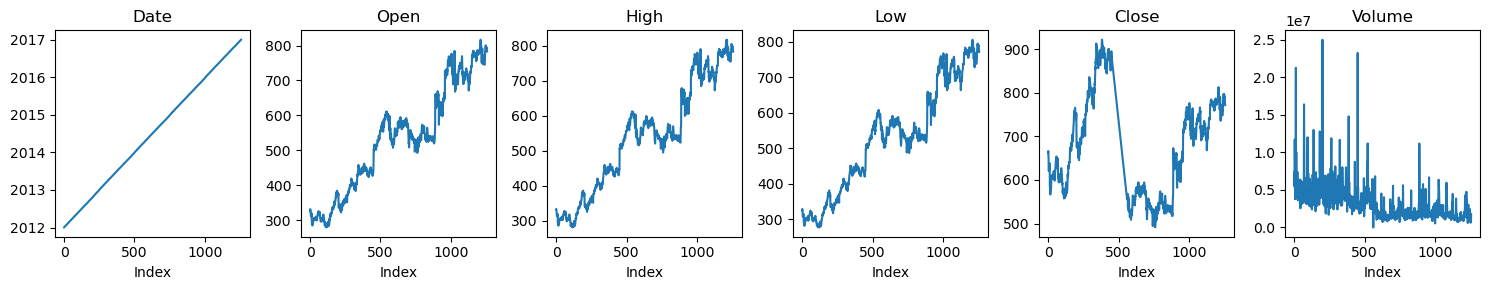

In [14]:
plt.figure(figsize=(15, 3))

# Iterate through columns and create subplots
for i, col in enumerate(sm_train.columns, 1):  # Start enumeration at 1 for subplot indexing
    plt.subplot(1, len(sm_train.columns), i)  # Create a subplot for each column
    sns.lineplot(data=sm_train, y=col, x=sm_train.index)
    plt.title(col)  # Set title for each subplot
    plt.ylabel('')  # Hide y-axis label
    plt.xlabel('Index')  # Label x-axis as Index

plt.tight_layout()  # Adjust subplots to fit in figure area
plt.show()

# Handling Data Issues in the Dataset
Upon analyzing the dataset, we observed discrepancies in the Closing Price values. Specifically:

The Closing Price is unrealistically high compared to the Opening Price.
The Closing Price does not align with the reported Day High Price, suggesting errors or inconsistencies in the data.
These issues render the affected rows unreliable for modeling purposes. As approximately 45% of the dataset is impacted, imputation methods such as using the mean, median, or mode are not viable, as they could introduce significant bias or distort patterns in the data.

Resolution:

We will exclude these records from the dataset to ensure the quality and integrity of the data used for training the model.

In [15]:
sm_train = sm_train.iloc[561:]

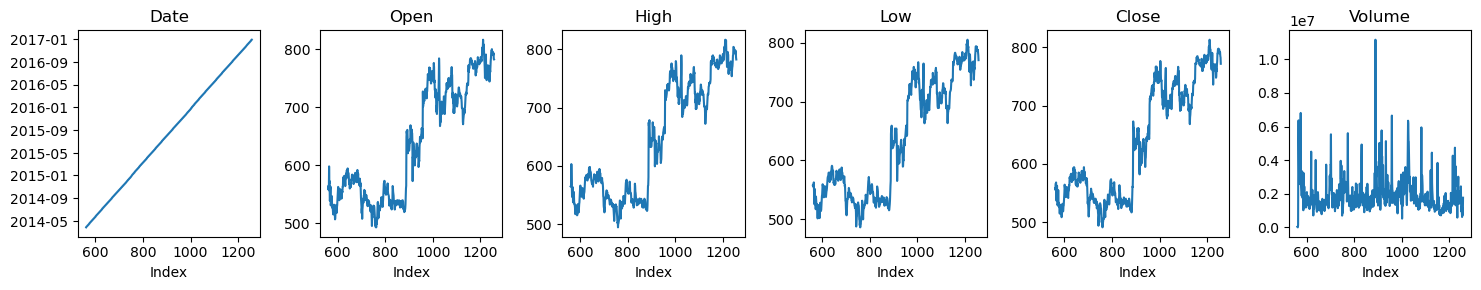

In [16]:
plt.figure(figsize=(15, 3))

# Iterate through columns and create subplots
for i, col in enumerate(sm_train.columns, 1):  # Start enumeration at 1 for subplot indexing
    plt.subplot(1, len(sm_train.columns), i)  # Create a subplot for each column
    sns.lineplot(data=sm_train, y=col, x=sm_train.index)
    plt.title(col)  # Set title for each subplot
    plt.ylabel('')  # Hide y-axis label
    plt.xlabel('Index')  # Label x-axis as Index

plt.tight_layout()  # Adjust subplots to fit in figure area
plt.show()

In [17]:
sm_train.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [18]:
sm_train

,Date,Open,High,Low,Close,Volume
561,2014-03-28,559.66,564.88,557.14,558.46,41200
562,2014-03-31,565.34,565.45,555.41,555.45,10800
563,2014-04-01,557.18,566.89,557.18,565.61,7900
564,2014-04-02,598.35,603.17,560.65,565.45,147100
565,2014-04-03,568.29,585.67,562.59,568.18,5099100
...,...,...,...,...,...,...
1253,2016-12-23,790.90,792.74,787.28,789.91,623400
1254,2016-12-27,790.68,797.86,787.66,791.55,789100
1255,2016-12-28,793.70,794.23,783.20,785.05,1153800
1256,2016-12-29,783.33,785.93,778.92,782.79,744300


In [19]:
# sm_train = sm_train.drop(['Date'], axis = 1)

In [20]:
sm_train.set_index('Date', inplace = True) # set Date column as index
sm_train.sort_index(inplace = True) # sort the Index

In [21]:
sm_train.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-03-28,559.66,564.88,557.14,558.46,41200
2014-03-31,565.34,565.45,555.41,555.45,10800
2014-04-01,557.18,566.89,557.18,565.61,7900
2014-04-02,598.35,603.17,560.65,565.45,147100
2014-04-03,568.29,585.67,562.59,568.18,5099100


In [22]:
scaler = MinMaxScaler()
sm_train = scaler.fit_transform(sm_train)
sm_train

array([[2.05207496e-01, 2.18158107e-01, 2.22351134e-01, 2.08940387e-01,
        2.98467330e-03],
       [2.22771971e-01, 2.19927964e-01, 2.16926406e-01, 1.99589948e-01,
        2.59926504e-04],
       [1.97538500e-01, 2.24399180e-01, 2.22476561e-01, 2.31151564e-01,
        0.00000000e+00],
       ...,
       [9.28938091e-01, 9.30292492e-01, 9.31203161e-01, 9.12832779e-01,
        1.02706821e-01],
       [8.96870555e-01, 9.04520897e-01, 9.17782446e-01, 9.05812184e-01,
        6.60034059e-02],
       [8.95076999e-01, 8.94740111e-01, 8.91097802e-01, 8.71734336e-01,
        1.57936721e-01]])

In [1]:
X_train = []
y_train = []


In [24]:
sm_train.shape[0]

697

In [25]:
time_stemp = 5
for i in range (time_stemp,sm_train.shape[0]):
    X_train.append(sm_train[i - time_stemp:i])
    y_train.append(sm_train[i,0])

In [26]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [27]:
X_train.shape,y_train.shape

((692, 5, 5), (692,))

## Bulid LSTM

In [28]:
X_train.shape[1],5

(5, 5)

In [29]:
model = Sequential()
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1],5)))
model.add(Dropout(0.2))

model.add(LSTM(units = 70, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 80)               │          27,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 80)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 5, 70)               │          42,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 70)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 5, 60)               │          31,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 60)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          22,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,491 (482.39 KB)

 Trainable params: 123,491 (482.39 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [32]:
model.fit(X_train, y_train, epochs = 40, batch_size = 16)

Epoch 1/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - loss: 0.1827
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0225
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0134
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0106
Epoch 5/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0088
Epoch 6/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0088
Epoch 7/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0098
Epoch 8/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0067
Epoch 9/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0071
Epoch 10/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0060
Epoch 11/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0066
Epoch 12/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0060
Epoch 13/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0060
Epoch 14/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0068
Epoch 15/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0084
Epo

In [33]:
past_60_days

,Date,Open,High,Low,Close,Volume
1198,10/6/2016,779.00,780.48,775.54,776.86,"1,070,700"
1199,10/7/2016,779.66,779.66,770.75,775.08,"933,200"
1200,10/10/2016,777.71,789.38,775.87,785.94,"1,174,900"
1201,10/11/2016,786.66,792.28,780.58,783.07,"1,372,500"
1202,10/12/2016,783.76,788.13,782.06,786.14,"937,400"
1203,10/13/2016,781.22,781.22,773.00,778.19,"1,365,300"
1204,10/14/2016,781.65,783.95,776.00,778.53,"852,500"
1205,10/17/2016,779.80,785.85,777.50,779.96,"1,093,000"
1206,10/18/2016,787.85,801.61,785.57,795.26,"2,056,900"
1207,10/19/2016,798.24,804.60,798.03,801.5,"1,766,800"


In [34]:
sm_test = pd.concat([past_60_days, sm_test], axis=0)

In [35]:
sm_test.shape

(80, 6)

In [36]:
sm_test.head()

,Date,Open,High,Low,Close,Volume
1198,10/6/2016,779.00,780.48,775.54,776.86,"1,070,700"
1199,10/7/2016,779.66,779.66,770.75,775.08,"933,200"
1200,10/10/2016,777.71,789.38,775.87,785.94,"1,174,900"
1201,10/11/2016,786.66,792.28,780.58,783.07,"1,372,500"
1202,10/12/2016,783.76,788.13,782.06,786.14,"937,400"


In [37]:
sm_test.tail()

,Date,Open,High,Low,Close,Volume
15,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
16,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
17,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
18,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"
19,1/31/2017,796.86,801.25,790.52,796.79,"2,160,600"


In [38]:
sm_test['Date'] = sm_test['Date'].apply(lambda x: pd.to_datetime(x, errors='coerce') if x != 'O' else pd.NaT)

In [39]:
# Convert Close to Float format from Object type
sm_test['Close'] = pd.to_numeric(sm_test['Close'], errors='coerce')

In [40]:
sm_test['Volume'] = sm_test['Volume'].astype(str).replace(',', '', regex=True)

In [41]:
sm_test['Volume'] = pd.to_numeric(sm_test['Volume'], errors='coerce')

In [42]:
sm_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 1198 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    80 non-null     datetime64[ns]
 1   Open    80 non-null     float64       
 2   High    80 non-null     float64       
 3   Low     80 non-null     float64       
 4   Close   80 non-null     float64       
 5   Volume  80 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 4.4 KB


In [43]:
sm_test.shape

(80, 6)

In [44]:
# sm_test = sm_test.drop(['Date'], axis = 1)

In [45]:
sm_test.set_index('Date', inplace = True) # set Date column as index
sm_test.sort_index(inplace = True) # sort the Index

In [46]:
sm_test.describe()

,Open,High,Low,Close,Volume
count,80.000000,80.000000,80.000000,80.000000,8.000000e+01
mean,787.189000,792.443375,780.754375,786.439125,1.724404e+06
std,20.044744,18.879989,20.646540,19.953445,7.653029e+05
min,744.590000,754.000000,727.540000,736.080000,5.874000e+05
25%,772.592500,779.272500,766.307500,771.102500,1.257675e+06
50%,787.255000,792.510000,783.180000,788.085000,1.580750e+06
75%,801.575000,805.002500,794.515000,799.145000,2.068700e+06
max,837.810000,841.950000,827.010000,835.670000,4.745200e+06


In [47]:
inputs = scaler.fit_transform(sm_test)
inputs

array([[0.3691268 , 0.30108016, 0.48255756, 0.40947886, 0.11623936],
       [0.37620682, 0.29175668, 0.43440233, 0.39160558, 0.08316898],
       [0.35528856, 0.40227402, 0.48587514, 0.50065268, 0.14130069],
       [0.451298  , 0.4352473 , 0.5332261 , 0.47183452, 0.18882582],
       [0.4201888 , 0.3880614 , 0.54810496, 0.50266091, 0.08417913],
       [0.39294143, 0.30949403, 0.45702222, 0.42283362, 0.18709414],
       [0.39755417, 0.34053439, 0.48718206, 0.42624762, 0.06375968],
       [0.37770865, 0.36213758, 0.50226199, 0.44060649, 0.12160277],
       [0.46406351, 0.5413303 , 0.58339198, 0.59423637, 0.3534321 ],
       [0.57552027, 0.57532689, 0.70865588, 0.65689326, 0.28365963],
       [0.62980047, 0.56816373, 0.68854931, 0.61140677, 0.28142287],
       [0.54076378, 0.5173394 , 0.66814115, 0.63550557, 0.16325942],
       [0.64696417, 0.69562251, 0.77691766, 0.77347123, 0.26699216],
       [0.7733319 , 0.71267766, 0.78013471, 0.71884727, 0.23786618],
       [0.6624115 , 0.60238772, 0.

In [48]:
X_test = []
y_test = []

In [49]:
for i in range(time_stemp,inputs.shape[0]):
    X_test.append(inputs[i-time_stemp:i])
    y_test.append(inputs[i,0])

In [50]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape,y_test.shape


((75, 5, 5), (75,))

In [51]:
y_test

array([0.39294143, 0.39755417, 0.37770865, 0.46406351, 0.57552027,
       0.62980047, 0.54076378, 0.64696417, 0.7733319 , 0.6624115 ,
       0.60512766, 0.6839734 , 0.54580562, 0.41085604, 0.36054495,
       0.24308088, 0.06511478, 0.32085389, 0.41632697, 0.37921047,
       0.49967818, 0.12819138, 0.1181077 , 0.025531  , 0.11381678,
       0.23954087, 0.28727741, 0.19330616, 0.30079382, 0.24822999,
       0.21100622, 0.16530787, 0.28899378, 0.2733319 , 0.13784596,
       0.        , 0.14074233, 0.21604806, 0.17603519, 0.29918472,
       0.37985411, 0.43391976, 0.52896374, 0.56650933, 0.56586569,
       0.59869127, 0.48948723, 0.55964385, 0.54977473, 0.51244368,
       0.49678181, 0.4944218 , 0.52681828, 0.41557606, 0.40935422,
       0.36708861, 0.46953443, 0.44507616, 0.54355289, 0.66305514,
       0.67871701, 0.6480369 , 0.67099335, 0.67464064, 0.67034971,
       0.65672602, 0.64932418, 0.66852607, 0.67217335, 0.83361939,
       0.91214332, 1.        , 0.96674533, 0.75166273, 0.56071

In [52]:
y_pred = model.predict(X_test)
y_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 842ms/step


array([[0.43947184],
       [0.44034636],
       [0.43069172],
       [0.4239939 ],
       [0.45319974],
       [0.49081653],
       [0.54267204],
       [0.57846093],
       [0.6365604 ],
       [0.6732568 ],
       [0.6618357 ],
       [0.6310951 ],
       [0.6058071 ],
       [0.55423754],
       [0.45782453],
       [0.36981145],
       [0.30041748],
       [0.2520786 ],
       [0.25752547],
       [0.34687847],
       [0.4216947 ],
       [0.4175024 ],
       [0.31393957],
       [0.17133607],
       [0.09589294],
       [0.08227895],
       [0.13580678],
       [0.17446215],
       [0.27799064],
       [0.2797055 ],
       [0.2740187 ],
       [0.24525473],
       [0.23547965],
       [0.2618268 ],
       [0.27506846],
       [0.23278311],
       [0.17705591],
       [0.1380706 ],
       [0.12956437],
       [0.16144377],
       [0.26433027],
       [0.33904785],
       [0.40648502],
       [0.47211134],
       [0.5336339 ],
       [0.5766458 ],
       [0.57764524],
       [0.566

In [53]:
scaler.scale_

array([1.07273117e-02, 1.13700966e-02, 1.00532824e-02, 1.00411688e-02,
       2.40511809e-07])

In [54]:
scale = 1/1.07273117e-02

In [55]:
y_pred = y_pred*scale
y_test = y_test*scale

In [56]:
y_pred

array([[40.967567 ],
       [41.049088 ],
       [40.149082 ],
       [39.52471  ],
       [42.24728  ],
       [45.753918 ],
       [50.587887 ],
       [53.92413  ],
       [59.34016  ],
       [62.761    ],
       [61.696323 ],
       [58.83069  ],
       [56.47334  ],
       [51.666023 ],
       [42.678402 ],
       [34.473824 ],
       [28.00492  ],
       [23.498766 ],
       [24.006525 ],
       [32.33601  ],
       [39.31038  ],
       [38.919575 ],
       [29.265448 ],
       [15.971949 ],
       [ 8.939139 ],
       [ 7.670044 ],
       [12.659908 ],
       [16.263363 ],
       [25.914288 ],
       [26.074146 ],
       [25.544024 ],
       [22.862646 ],
       [21.951414 ],
       [24.407495 ],
       [25.641882 ],
       [21.70004  ],
       [16.505152 ],
       [12.870941 ],
       [12.0779915],
       [15.049788 ],
       [24.640867 ],
       [31.606041 ],
       [37.892532 ],
       [44.01022  ],
       [49.74535  ],
       [53.75492  ],
       [53.84809  ],
       [52.82

In [57]:
y_test

array([36.63000012, 37.06000012, 35.21000012, 43.26000014, 53.65000018,
       58.7100002 , 50.41000017, 60.3100002 , 72.09000024, 61.75000021,
       56.41000019, 63.76000021, 50.88000017, 38.30000013, 33.61000011,
       22.66000008,  6.07000002, 29.9100001 , 38.81000013, 35.35000012,
       46.58000015, 11.95000004, 11.01000004,  2.38000001, 10.61000004,
       22.33000007, 26.78000009, 18.02000006, 28.04000009, 23.14000008,
       19.67000007, 15.41000005, 26.94000009, 25.48000008, 12.85000004,
        0.        , 13.12000004, 20.14000007, 16.41000005, 27.89000009,
       35.41000012, 40.45000013, 49.31000016, 52.81000018, 52.75000018,
       55.81000019, 45.63000015, 52.17000017, 51.25000017, 47.77000016,
       46.31000015, 46.09000015, 49.11000016, 38.74000013, 38.16000013,
       34.22000011, 43.77000015, 41.49000014, 50.67000017, 61.81000021,
       63.27000021, 60.4100002 , 62.55000021, 62.89000021, 62.49000021,
       61.2200002 , 60.5300002 , 62.32000021, 62.66000021, 77.71

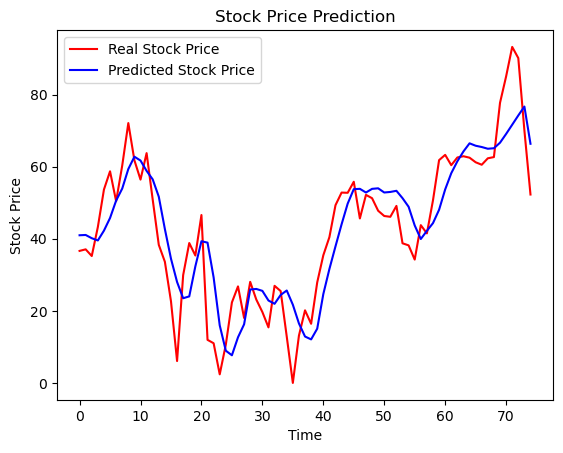

In [58]:
# Visualize the results
plt.plot(y_test, color='red', label='Real Stock Price')  # Plot actual 'Open' prices in red
plt.plot(y_pred, color='blue', label='Predicted Stock Price')  # Plot predicted 'Open' prices in blue
plt.title('Stock Price Prediction')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('Stock Price')  # Y-axis label
plt.legend()  # Display legend to differentiate actual vs. predicted prices
plt.show()